In [1]:
from keras.datasets import fashion_mnist

In [2]:
#import libraries
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras as kr
from keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D , AveragePooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Normalize the train data and test data into float32 and divide by 255


x_train = x_train.astype('float32')/255
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')/255

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train.shape[1:]

(28, 28)

In [7]:
y_train.shape

(60000,)

### validation

In [8]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
xnew_train, x_val, ynew_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)


In [9]:
#convert y_train and y_test into 10 categories
y_train = kr.utils.to_categorical(y_train, 10)
y_test  = kr.utils.to_categorical(y_test,10)

In [10]:
y_train.shape

(60000, 10)

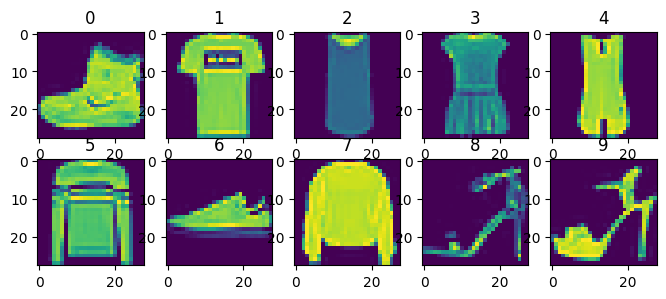

In [11]:
plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.title(i)
    plt.imshow(x_train[i].reshape(28,28))

<font color="blue"> <h1> <b> CNN

In [12]:
xnew_train = xnew_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [13]:
class CNNModel:
    def __init__(self, input_shape, optimizer, checkpoint, early_stopping):       # Constructor
        self.input_shape = input_shape
        self.optimizer = optimizer
        self.checkpoint= checkpoint
        self.early_stopping= early_stopping
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Conv2D(32,(4,4), activation='relu',padding='same', input_shape=self.input_shape))
        model.add(BatchNormalization())

        model.add(Conv2D(32,(4,4),padding='same', activation='relu'))
        model.add(BatchNormalization())

        model.add(Dropout(0.2))
        model.add(BatchNormalization())

        model.add(Conv2D(32,(4,4),padding='same', activation='relu'))
        model.add(BatchNormalization())

        model.add(AveragePooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        return model

    def compile_model(self):
        self.model.compile(optimizer=self.optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    def train_model(self, X_train, y_train, epochs=100, batch_size=32, validation_data=None):
        history = self.model.fit(X_train, y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 validation_data=validation_data,
                                 callbacks=[self.checkpoint, self.early_stopping])

        return self.model, history


<b> Restore_best_weights=True EarlyStopping callback. <br> It makes the model restore the weights of the best iteration when the training stops.

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

opt= keras.optimizers.SGD(
    learning_rate=0.0001,
    momentum=0.09,
    nesterov=True,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=True,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="SGD"
)


early_stopping= keras.callbacks.EarlyStopping(
    monitor="val_loss",                   # watch validation loss
    min_delta=0,
    patience=4,                          # patience:  number of epochs with no improvement after which training will be stopped
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0)

checkpoint= keras.callbacks.ModelCheckpoint(
    'CNNmodel_weights.h5',                      # file name model will be saved in h5 format
    monitor="val_loss",
    verbose=0,
    save_best_only=True,                         # will save the model weights only when the val_loss  has improved from the previous best value
    save_weights_only=False,                     # only the weights of the model will be saved, rather than saving the entire model
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None,
)

In [15]:
print(x_val.shape)

(18000, 28, 28, 1)


<h3> Add categories

In [16]:
from keras.utils import to_categorical

# Convert integer labels to one-hot encoded labels
y_train_encoded = to_categorical(ynew_train, num_classes=10)
y_val_encoded = to_categorical(y_val, num_classes=10)

In [17]:
y_train_encoded.shape

(42000, 10)

In [18]:
# Create CNN model object
cnn_model = CNNModel(input_shape=xnew_train.shape[1:], optimizer=opt, checkpoint=checkpoint, early_stopping=early_stopping)

# Compile the model
cnn_model.compile_model()

# Train the model
trained_model, history = cnn_model.train_model(xnew_train, y_train_encoded, epochs=500, batch_size=64, validation_data=(x_val, y_val_encoded))


Epoch 1/500
657/657 [==============================] - ETA: 0s - loss: 1.4358 - accuracy: 0.5173

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


657/657 [==============================] - 18s 17ms/step - loss: 1.4358 - accuracy: 0.5173 - val_loss: 1.0084 - val_accuracy: 0.6987
Epoch 2/500
657/657 [==============================] - 13s 20ms/step - loss: 0.8374 - accuracy: 0.7253 - val_loss: 0.7216 - val_accuracy: 0.7598
Epoch 3/500
657/657 [==============================] - 9s 14ms/step - loss: 0.7013 - accuracy: 0.7651 - val_loss: 0.6392 - val_accuracy: 0.7820
Epoch 4/500
657/657 [==============================] - 10s 16ms/step - loss: 0.6354 - accuracy: 0.7827 - val_loss: 0.5924 - val_accuracy: 0.7948
Epoch 5/500
657/657 [==============================] - 9s 13ms/step - loss: 0.5934 - accuracy: 0.7949 - val_loss: 0.5596 - val_accuracy: 0.8060
Epoch 6/500
657/657 [==============================] - 9s 13ms/step - loss: 0.5645 - accuracy: 0.8047 - val_loss: 0.5345 - val_accuracy: 0.8137
Epoch 7/500
657/657 [==============================] - 8s 12ms/step - loss: 0.5408 - accuracy: 0.8120 - val_loss: 0.5149 - val_accuracy: 0.8208
E

KeyboardInterrupt: 

<font color= "blue"> <h5> <b> Display model loss vs accuray

NameError: name 'history' is not defined

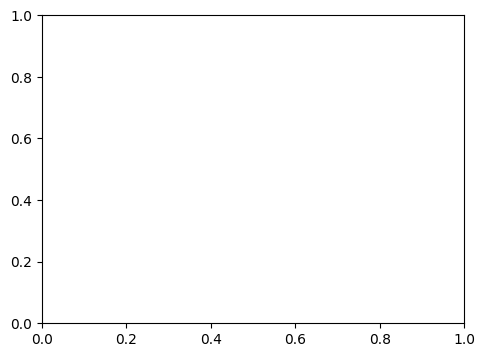

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


<font color= "blue"> <h1> <b> Model Loading and testing

In [20]:
file_path= '/content/CNNmodel_weights.h5'            # same as a csv file path. Copy the file path

loaded_model= keras.saving.load_model(file_path, custom_objects=None, compile=True, safe_mode=True)

In [21]:
#Let's predict whole test data!
predictions = loaded_model.predict(x_test)
results = np.argmax(predictions,axis=1)
results = pd.Series(results, name="Label")

313/313 [==============================] - 1s 2ms/step


In [22]:
results

0       9
1       2
2       1
3       1
4       6
       ..
9995    9
9996    1
9997    8
9998    1
9999    5
Name: Label, Length: 10000, dtype: int64

In [23]:
# Evaluate the model on the test data
loss, accuracy = loaded_model.evaluate(x_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3722 - accuracy: 0.8647
Test Loss: 0.37224000692367554
Test Accuracy: 0.8647000193595886


In [ ]:
# history.history